In [21]:
import pandas as pd
import numpy as np
import os

from itertools import combinations
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
# make a single dataframe from all the month files

In [24]:
files = os.listdir('data/')
print(files)
files[0]

['Sales_December_2019.csv', 'Sales_April_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 'Sales_August_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_January_2019.csv', 'Sales_September_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv']


'Sales_December_2019.csv'

In [25]:
dataframe = pd.DataFrame()

for file in files:
    data = pd.read_csv('data/'+file)
    dataframe = pd.concat([dataframe, data])
    
dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [26]:
# save the data to a csv file and then read it 

In [27]:
# dataframe.to_csv('sales_data.csv', index=False)

df = pd.read_csv('sales_data.csv')
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"


In [28]:
df.shape

(186850, 6)

In [29]:
# handle null values

In [30]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [31]:
df.dropna(axis=0, inplace=True, how='all')

In [32]:
# check if all the months are there or not

In [33]:
df['Order Date'][0].split(' ')[0].split('/')[0]

'12'

In [34]:
df['Month'] = df['Order Date'].apply(lambda x: x.split(' ')[0].split('/')[0])
# or => df['Month'] = df['Order Date'].str[:2]
df['Month'].unique()

array(['12', 'Order', '01', '04', '05', '02', '03', '08', '09', '06',
       '11', '10', '07'], dtype=object)

In [35]:
df.shape

(186305, 7)

In [36]:
# find 'Order' and delete it

In [37]:
print(len(df[df['Month'] == 'Order']))
df[df['Month'] == 'Order'].head(2)

355


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order


In [38]:
print(186305-355)

df = df[df['Month'] != 'Order'] # creating a new dataframe containing rows without 'Order'
df.shape

185950


(185950, 7)

In [20]:
# change datatypes of order date and month column

In [41]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df[['Order ID', 'Quantity Ordered', 'Price Each', 'Month']] = df[
    ['Order ID', 'Quantity Ordered', 'Price Each', 'Month']].apply(pd.to_numeric)
df.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
dtype: object

In [22]:
# make a new columns Months where the names of months are given

In [42]:
df['Months'] = df['Order Date'].dt.month_name()
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Months
0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,December
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,December


In [24]:
# what was the best month for sales & how much was earned that month & plot it 

In [46]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each'] # sales = Quantity * Price
sales_by_month = df.groupby('Months')['Sales'].sum()
sales_by_month.sort_values(ascending=False)

Months
December     4.613443e+06
October      3.736727e+06
April        3.390670e+06
November     3.199603e+06
May          3.152607e+06
March        2.807100e+06
July         2.647776e+06
June         2.577802e+06
August       2.244468e+06
February     2.202022e+06
September    2.097560e+06
January      1.822257e+06
Name: Sales, dtype: float64

In [47]:
sales_by_month['December']
# so December is the best month for sales with sales around 4.6 million

4613443.340001534

In [48]:
sales_by_month = sales_by_month.to_frame().reset_index()
sales_by_month.head(2)

,Months,Sales
0,April,3.390670e+06
1,August,2.244468e+06


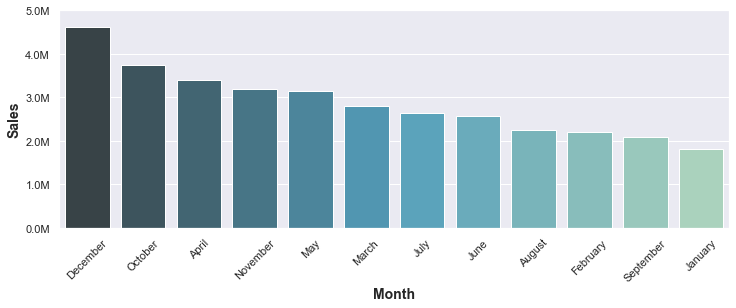

In [49]:
sns.set()
plt.figure(figsize=(12,4))
g = sns.barplot(x='Months', y='Sales', data=sales_by_month, palette='GnBu_d',
            order=sales_by_month.sort_values('Sales',ascending = False).Months);

g.set_xlabel("Month", fontsize=14, fontweight='bold')
g.set_ylabel("Sales", fontsize=14, fontweight='bold')

g.set(ylim = (0,5000000))
ylabels = ['{:,.1f}'.format(x) + 'M' for x in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)
xlabel = sales_by_month.sort_values(by='Sales', ascending=False)['Months']
g.set_xticklabels(xlabel, rotation=45);

In [29]:
# which city had the highest number of sales

In [50]:
df['Purchase Address'][0].split(',')[1][1:] + df['Purchase Address'][0].split(',')[2].split(' ')[1]

'New York CityNY'

In [51]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1][1:] + ' (' + x.split(',')[2].split(' ')[1] + ')')
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Months,Sales,City
0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,December,1700.0,New York City (NY)
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,December,600.0,New York City (NY)


In [52]:
df.City.unique()

array(['New York City (NY)', 'San Francisco (CA)', 'Atlanta (GA)',
       'Portland (OR)', 'Dallas (TX)', 'Los Angeles (CA)', 'Boston (MA)',
       'Austin (TX)', 'Portland (ME)', 'Seattle (WA)'], dtype=object)

In [53]:
sales_by_city = df.groupby('City')['Sales'].sum()
sales_by_city.sort_values(ascending=False)

City
San Francisco (CA)    8.262204e+06
Los Angeles (CA)      5.452571e+06
New York City (NY)    4.664317e+06
Boston (MA)           3.661642e+06
Atlanta (GA)          2.795499e+06
Dallas (TX)           2.767975e+06
Seattle (WA)          2.747755e+06
Portland (OR)         1.870732e+06
Austin (TX)           1.819582e+06
Portland (ME)         4.497583e+05
Name: Sales, dtype: float64

In [54]:
# what time should the advertisements be displayed to increase the sale

In [55]:
df['Hour'] = df['Order Date'].dt.hour
df.Hour.nunique()

24

In [56]:
sales_count_by_hour = df['Hour'].value_counts()
sales_count_by_hour

19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
21    10921
17    10899
16    10384
15    10175
22     8822
9      8748
23     6275
8      6256
7      4011
0      3910
6      2482
1      2350
5      1321
2      1243
4       854
3       831
Name: Hour, dtype: int64

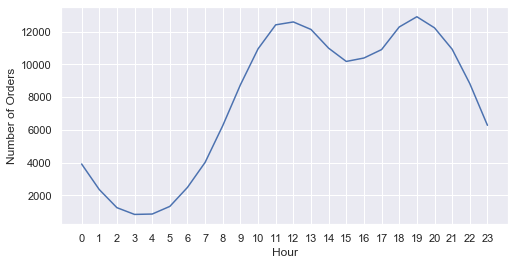

In [57]:
plt.figure(figsize=(8,4))
plt.plot(sales_count_by_hour.sort_index().index, sales_count_by_hour.sort_index());
plt.xticks(sales_count_by_hour.index)
plt.xlabel('Hour'); plt.ylabel('Number of Orders');

In [38]:
# what products are often sold together

In [39]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Months,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,December,1700.0,New York City (NY),0
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,December,600.0,New York City (NY),7


In [58]:
# basically it means all the products will have the same order id
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Months,Sales,City,Hour
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,December,600.00,Boston (MA),12
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,December,11.95,Boston (MA),12
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,December,99.99,Boston (MA),12
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,December,11.99,Boston (MA),12
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,December,400.00,New York City (NY),14
37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,December,23.90,New York City (NY),14
42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,December,3.84,Austin (TX),12
43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,December,99.99,Austin (TX),12
66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,December,700.00,Boston (MA),14
67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,December,14.95,Boston (MA),14


In [59]:
df_dup.shape

(14649, 11)

In [60]:
df_dup['Grouped'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Months,Sales,City,Hour,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,December,600.00,Boston (MA),12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,December,11.95,Boston (MA),12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,December,99.99,Boston (MA),12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,December,11.99,Boston (MA),12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,December,400.00,New York City (NY),14,"Vareebadd Phone,USB-C Charging Cable"


In [61]:
df_dup = df_dup[['Order ID', 'Grouped']].drop_duplicates()
df_dup.head(2)

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"


In [62]:
count_2 = Counter()

for row in df_dup['Grouped']:
    row_list = row.split(',')
    count_2.update(Counter(combinations(row_list, 2)))
    
count_2.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [63]:
# which product was sold the most & why

In [64]:
prod = df.groupby('Product').sum()['Quantity Ordered']
prod.sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [65]:
# why maybe due to the prices
prices = df.groupby('Product').mean()['Price Each']
prices.sort_values()

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64

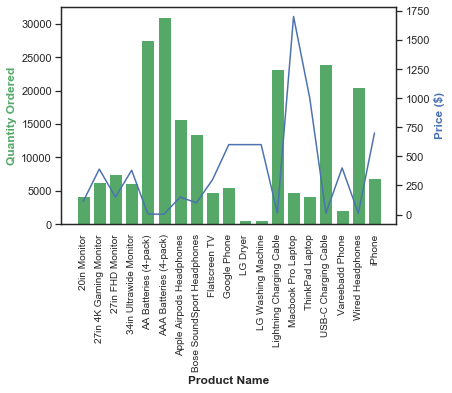

In [66]:
sns.set_style('white')

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(prod.index, prod.values, color='g')
ax2.plot(prices.index, prices.values, color='b')

ax1.set_xlabel('Product Name', fontweight='bold')
ax1.set_ylabel('Quantity Ordered', color='g', fontweight='bold')
ax2.set_ylabel('Price ($)', color='b', fontweight='bold')
ax1.set_xticklabels(prod.index, rotation='vertical', size=10);

# as we can see if the price is low, sale of the product is high

In [67]:
# how many streets have the word 'church' in its name

In [68]:
df['Purchase Address'][0].lower().split()

['136', 'church', 'st,', 'new', 'york', 'city,', 'ny', '10001']

In [69]:
def find_church(address):
    if 'church' in address.lower().split():
        return True
    else:
        return False

In [70]:
sum(df['Purchase Address'].apply(lambda x: find_church(x))) # or .sum in the end

3904

In [71]:
# find the products sold less than 100 times in April

In [72]:
prod_count_april = df[df['Months'] == 'April']['Product'].value_counts()
prod_count_april[prod_count_april < 100]

LG Dryer              78
LG Washing Machine    61
Name: Product, dtype: int64

In [73]:
# find different content rating as per genre

In [74]:
new = df.groupby('Order ID')['Sales'].sum()
new = new.to_frame()
new

,Sales
Order ID,
141234,700.00
141235,14.95
141236,23.98
141237,149.99
141238,11.99
141239,2.99
141240,389.99
141241,11.95
141242,99.99


In [89]:
pd.crosstab(df.Product, df.City)

City,Atlanta (GA),Austin (TX),Boston (MA),Dallas (TX),Los Angeles (CA),New York City (NY),Portland (ME),Portland (OR),San Francisco (CA),Seattle (WA)
Product,,,,,,,,,,
20in Monitor,338,228,394,340,654,555,59,218,993,322
27in 4K Gaming Monitor,492,318,673,479,1003,840,85,348,1456,536
27in FHD Monitor,584,356,793,580,1217,1069,114,414,1803,577
34in Ultrawide Monitor,478,328,669,511,953,865,76,326,1442,533
AA Batteries (4-pack),1661,1071,2215,1693,3289,2675,293,1144,4903,1633
AAA Batteries (4-pack),1598,1091,2301,1650,3313,2773,237,1122,4932,1624
Apple Airpods Headphones,1263,882,1642,1187,2452,2079,228,861,3705,1250
Bose SoundSport Headphones,1077,694,1402,1055,2099,1771,178,705,3287,1057
Flatscreen TV,405,242,551,419,724,625,62,249,1149,374
